In [1]:
import xarray as xr

In [2]:
cube = xr.open_zarr("C:\\Users\\Norman\\EOData\\DCS4COP\\OLCI-SNS-RAW-CUBE.zarr")

In [3]:
cube

<xarray.Dataset>
Dimensions:        (bnds: 2, lat: 1000, lon: 2000, time: 216)
Coordinates:
  * lat            (lat) float64 52.5 52.5 52.49 52.49 52.49 52.49 52.48 ...
    lat_bnds       (lat, bnds) float64 dask.array<shape=(1000, 2), chunksize=(1000, 2)>
  * lon            (lon) float64 0.00125 0.00375 0.00625 0.00875 0.01125 ...
    lon_bnds       (lon, bnds) float64 dask.array<shape=(2000, 2), chunksize=(2000, 2)>
  * time           (time) datetime64[ns] 2016-11-24T09:43:16.372487168 ...
    time_bnds      (time, bnds) datetime64[ns] dask.array<shape=(216, 2), chunksize=(1, 2)>
Dimensions without coordinates: bnds
Data variables:
    c2rcc_flags    (time, lat, lon) float64 dask.array<shape=(216, 1000, 2000), chunksize=(1, 1000, 2000)>
    conc_chl       (time, lat, lon) float64 dask.array<shape=(216, 1000, 2000), chunksize=(1, 1000, 2000)>
    conc_tsm       (time, lat, lon) float64 dask.array<shape=(216, 1000, 2000), chunksize=(1, 1000, 2000)>
    kd489          (time, lat, lon) f

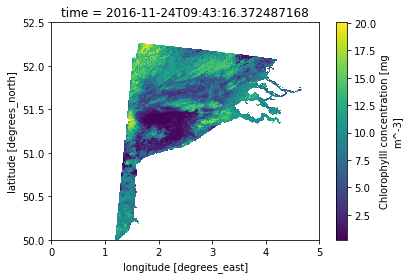

In [5]:
cube.conc_chl.isel(time=0).plot.imshow()

In [26]:
import numpy as np
ids = np.arange(0, 2000, dtype=np.int32)
id_coords = xr.DataArray(ids, dims=["id"])
coords = {"id": id_coords}
lon_points = xr.DataArray(np.random.uniform(0.95 * cube.lon.min(), 1.05 * cube.lon.max(), 2000), dims=["id"], coords=coords)
lat_points = xr.DataArray(np.random.uniform(0.95 * cube.lat.min(), 1.05 * cube.lat.max(), 2000), dims=["id"], coords=coords)

time_indexes = ids % len(cube.time)
np.random.shuffle(time_indexes)
time_points = xr.DataArray(cube.time[time_indexes].values, dims=["id"], coords=coords) 
points = xr.Dataset(dict(lon=lon_points, lat=lat_points, time=time_points), coords=coords)

In [28]:
points

<xarray.Dataset>
Dimensions:  (id: 2000)
Coordinates:
  * id       (id) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
Data variables:
    lon      (id) float64 3.333 5.08 3.309 3.023 4.83 2.019 0.6828 1.752 ...
    lat      (id) float64 51.4 48.42 50.43 48.64 48.9 49.23 53.98 53.77 ...
    time     (id) datetime64[ns] 2017-09-03T10:46:13.143121664 ...

In [30]:
sel_points = cube.sel(time=points.time, lat=points.lat, lon=points.lon, method="nearest")

In [31]:
sel_points

<xarray.Dataset>
Dimensions:        (bnds: 2, id: 2000)
Coordinates:
    lat            (id) float64 51.4 50.0 50.43 50.0 50.0 50.0 52.5 52.5 ...
    lat_bnds       (id, bnds) float64 dask.array<shape=(2000, 2), chunksize=(2000, 2)>
    lon            (id) float64 3.334 4.999 3.309 3.024 4.829 2.019 0.6837 ...
    lon_bnds       (id, bnds) float64 dask.array<shape=(2000, 2), chunksize=(2000, 2)>
    time           (id) datetime64[ns] 2017-09-03T10:46:13.143121664 ...
    time_bnds      (id, bnds) datetime64[ns] dask.array<shape=(2000, 2), chunksize=(2000, 2)>
  * id             (id) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
Dimensions without coordinates: bnds
Data variables:
    c2rcc_flags    (id) float64 dask.array<shape=(2000,), chunksize=(2000,)>
    conc_chl       (id) float64 dask.array<shape=(2000,), chunksize=(2000,)>
    conc_tsm       (id) float64 dask.array<shape=(2000,), chunksize=(2000,)>
    kd489          (id) float64 dask.array<shape=(2000,), chunksize=(

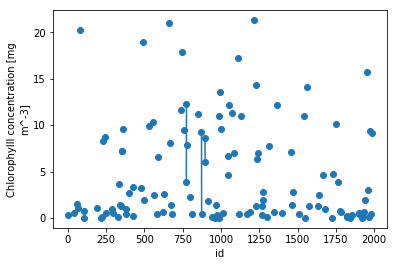

In [36]:
sel_points.conc_chl.plot(marker="o")

In [ ]:
cube.load()
interp_points = cube.interp(time=points.time, lat=points.lat, lon=points.lon)